# Logistic regression for a 2D classification problem

Imports...

In [3]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 17.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 10.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Packages for logistic regression: scikit-learn or statsmodels
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

## Load and visualize data

In [7]:
data = pd.read_csv("2d-classification-data.csv")
data.head(10)

,x1,x2,y,z1,z2
0,0.689081,-0.273955,0,0.474833,0.075051
1,-0.972862,-1.960965,1,0.946460,3.845385
2,0.129132,-0.882432,0,0.016675,0.778686
3,1.625773,-0.429262,1,2.643138,0.184266
4,-1.900579,0.685747,1,3.612201,0.470249
5,1.348683,1.885999,1,1.818945,3.556991
6,-1.772268,-0.198705,1,3.140935,0.039484
7,0.329881,0.746551,0,0.108822,0.557339
8,0.600163,0.907658,1,0.360196,0.823843
9,-0.504609,0.326328,0,0.254631,0.106490


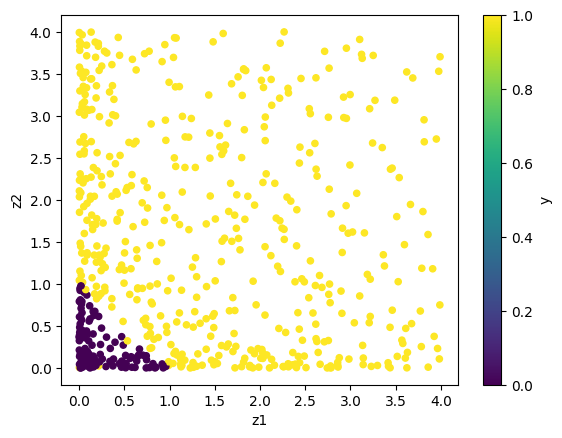

In [17]:
data.plot.scatter(x="z1", y="z2", c="y", cmap = "viridis");
# we can draw linear decision boundary here

## Define and fit the model

In [18]:
# Select model input variables
X = data[["z1", "z2"]].copy()
X

,z1,z2
0,0.474833,0.075051
1,0.946460,3.845385
2,0.016675,0.778686
3,2.643138,0.184266
4,3.612201,0.470249
...,...,...
595,0.912585,2.054487
596,0.061714,0.358177
597,0.122230,2.007258
598,2.628686,0.314471


In [19]:
# Define a model and fit it
# Note: sklearn.linear_model.LogisticRegression adds an intercept automatically.
model = LogisticRegression(penalty=None)
model.fit(X, data["y"])

LogisticRegression(penalty=None)

In [20]:
# parameters
beta_1, beta_2 = model.coef_[0]
beta_0 = model.intercept_.item()
print(beta_0, beta_1, beta_2)

-10.285993967376992 10.639227974414379 10.475697742829427


In [21]:
# alternative: statsmoidels
model_sm = sm.Logit(data["y"], sm.add_constant(X))
results = model_sm.fit()
print(results.summary())

# small difference because statsmodels uses penalty terms by default
# it's not needed to use here as there are not many outliers

Optimization terminated successfully.
         Current function value: 0.065198
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  600
Model:                          Logit   Df Residuals:                      597
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.8679
Time:                        10:45:06   Log-Likelihood:                -39.119
converged:                       True   LL-Null:                       -296.04
Covariance Type:            nonrobust   LLR p-value:                2.646e-112
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3198      1.686     -6.120      0.000     -13.625      -7.015
z1            10.6802      1

## Use model for Prediction

In [22]:
# Prediction of training samples
# skilearn
data['prediction'] = model.predict(X)
data['probability'] = model.predict_proba(X)[:,1]

In [ ]:
# statsmodels
data['prediction_sm'] = (model_sm.predict(results.params) > 0.5) * 1.0
data['probability'] = model.predict_proba(X)[:,1]

In [ ]:
# Parameters
# TODO

## Visualization

In [ ]:
# Predictions with decision boundary
data.plot.scatter(x="x1", y="x2", c="prediction")
x1 = np.linespace(-1, 1, 1000)
x2 = +np.sqrt

In [ ]:
# Decision boundary vs. ground truth
data.plot.scatter(x="x1", y="x2", cmap="viridis");
x1 = np.linespace

In [ ]:
# Probabilities
data.plot.scatter(x="x1", y="x2", c="probability", cmap="viridis");

plt.plot(x1, x2, c="black", linestyle=)